## Linear Correlation Analysis

The correlation coefficient measures the extent to which the relationship between two variables is linear. Its value is always between -1 and 1. A positive coefficient indicates that the variables are directly related, i.e. when one increases the other one also increases. A negative coefficient indicates that the variables are inversely related, so that when one increases the other decreases. The closer to 0 the correlation coefficient is, the weaker the relationship between the variables. Two random sets of data will have a correlation coefficient close to 0.

#### Correlation vs. Covariance

Correlation is simply a normalized form of covariance. They are otherwise the same and are often used semi-interchangeably in everyday conversation. It is obviously important to be precise with language when discussing the two, but conceptually they are almost identical.

#### Covariance isn't that meaningful by itself

In [2]:
import yfinance as yf
import requests
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from matplotlib import style
from math import pi

import scipy.stats as stats

yf.pdr_override()

In [3]:
X = np.random.rand(50)
Y = 2 * X + np.random.normal(0, 0.1, 50)

np.cov(X, Y)[0, 1]

0.16020548700680368

In [5]:
X = np.random.rand(50)
Y = 2 * X + 4

print('Covariance of X and Y: \n' + str(np.cov(X, Y)))
print('Correlation of X and Y: \n' + str(np.corrcoef(X, Y)))

Covariance of X and Y: 
[[0.07903566 0.15807132]
 [0.15807132 0.31614265]]
Correlation of X and Y: 
[[1. 1.]
 [1. 1.]]


### Use in Finance: Determining Related Assets

Once we've established that two series are probably related, we can use that in an effort to predict future values of the series. For example, let's look at the price of Apple and a semiconductor equipment manufacturer, Lam Research Corporation.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Correlation coefficients
LRCX and AAPL:  0.9595011806280559
LRCX and SPY:  0.9390677654205669
AAPL and SPY:  0.9078498165287198


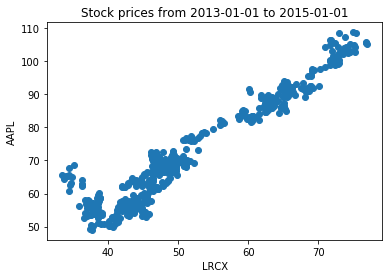

In [24]:
bench = pdr.get_data_yahoo('SPY', start="2013-01-01", end="2015-01-01", interval = "1d")['Adj Close']
a1 = pdr.get_data_yahoo('LRCX', start="2013-01-01", end="2015-01-01", interval = "1d")['Adj Close']
a2 = pdr.get_data_yahoo('AAPL', start="2013-01-01", end="2015-01-01", interval = "1d")['Adj Close']

start="2013-01-01"
end="2015-01-01"

plt.scatter(a1,a2)
plt.xlabel('LRCX')
plt.ylabel('AAPL')
plt.title('Stock prices from ' + start + ' to ' + end)
print ("Correlation coefficients")

print ("LRCX and AAPL: ", np.corrcoef(a1,a2)[0,1])
print ("LRCX and SPY: ", np.corrcoef(a1,bench)[0,1])
print ("AAPL and SPY: ", np.corrcoef(bench,a2)[0,1])

#### Constructing a portfolio of uncorrelated assets

Another reason that correlation is useful in finance is that uncorrelated assets produce the best portfolios. The intuition for this is that if the assets are uncorrelated, a drawdown in one will not correspond with a drawdown in another. This leads to a very stable return stream when many uncorrelated assets are combined.

## Limitations

#### Significance

It's hard to rigorously determine whether or not a correlation is significant, especially when, as here, the variables are not normally distributed. Their correlation coefficient is close to 1, so it's pretty safe to say that the two stock prices are correlated over the time period we use, but is this indicative of future correlation? If we examine the correlation of each of them with the S&P 500, we see that it is also quite high. So, AAPL and LRCX are slightly more correlated with each other than with the average stock.

One fundamental problem is that it is easy to datamine correlations by picking the right time period. To avoid this, one should compute the correlation of two quantities over many historical time periods and examine the distibution of the correlation coefficient. More details on why single point estimates are bad will be covered in subsequent experiments.


As example, the correlation of AAPL and LRCX from 2013-1-1 to 2015-1-1 was 0.95. Let's take the rolling 60 day correlation between the two to see how that varies.

Text(0, 0.5, '60-day Rolling Correlation')

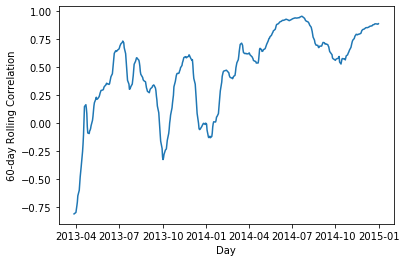

In [31]:
import pandas as pd

rolling_correlation = a1.rolling(60).corr(a2)
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')

### Non-Linear Relationships

The correlation coefficient can be useful for examining the strength of the relationship between two variables. However, it's important to remember that two variables may be associated in different, predictable ways which this analysis would not pick up. For instance, one variable might precisely follow the behavior of a second, but with a delay. There are techniques for dealing with this lagged correlation. Alternatively, a variable may be related to the rate of change of another. Neither of these relationships are linear, but can be very useful if detected.

Additionally, the correlation coefficient can be very sensitive to outliers. This means that including or excluding even a couple of data points can alter your result, and it is not always clear whether these points contain information or are simply noise.

As example, changing the noise distribution to poisson rather than normal:

0.1380005247942661

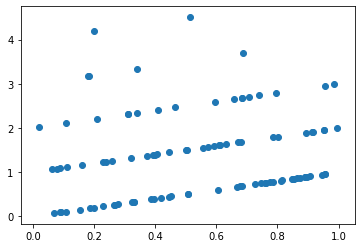

In [32]:
X = np.random.rand(100)
Y = X + np.random.poisson(size=100)

plt.scatter(X, Y)

np.corrcoef(X, Y)[0, 1]

### Closing

Correlation is a powerful technique, but as always in statistics, one should be careful not to interpret results where there are none.